# Introduction to Machine Learning with Scikit-Learn

Resources for Machine Learning

**Text**

- [Elements of Statistical Learning](http://statweb.stanford.edu/~tibs/ElemStatLearn/) \$71 (free PDF)
- [Introduction to Statistical Learning](http://www-bcf.usc.edu/~gareth/ISL/) \$54 (free PDF)
- [Learn from Data](http://www.amazon.com/gp/product/1600490069) \$28

**Online classes**

- [Stanford's Introduction to Statistical Learning](http://online.stanford.edu/course/statistical-learning-winter-2014)
- [Coursera's Machine Learning](https://www.coursera.org/course/ml)
- [Caltech's Learning from Data](http://work.caltech.edu/telecourse.html)

** Websites**

- [Kaggle](http://www.kaggle.com)

** Online `sklearn` videos ** 

- [Jake Vanderplas'](http://www.astro.washington.edu/users/vanderplas/) excellent videos on Scikit-learn:
    - [PyData NYC 2013](https://vimeo.com/80093925) 1.5 hours
    - [Scipy 2013](http://pyvideo.org/video/2157/intro-to-scikit-learn-i-scipy2013-tutorial-pa-7) 8 hours.
    - [PyCon 2013](http://www.youtube.com/watch?v=4ONBVNm3isI) 3 hours.
    - [PyData NYC 2012](http://vimeo.com/53062607) 45 minutes.
    - ...
    


## Outline

- Goal:
    - Introduction to `sklearn` API
    - Discuss basic ML concepts.
- What are some questions that `scikit learn` can address?
- Supervised Learning
- Model Selection
    - Cross validation
    - Bias-variance trade-off
    - Regularization
- Unsupervised learning
    - PCA
    - Clustering
- What we are not covering?

    

## Why `sklearn`?

- Consistent interface
- Great documentation
- More data $\rightarrow$ ML is more valuable
- Opportunity everywhere (almost)

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
try:
    import smash
    reload(smash)
except:
    pass
colors = plt.rcParams['axes.color_cycle']

## Machine Learning Questions




Let's look at this from a data perspective.

Input data:

- The $X$ matrix has $n$ samples and $m$ featues ($n , m$).
- We refer to $X$ as the **freatures**

Value to estimate:

- The $y$ vector has $n$ values ($n,$)
- Called the **response** vector.



### Boston Housing

In [3]:
from sklearn import datasets
boston = datasets.load_boston()
X = boston.data
y = boston.target

print(X.shape)
print(y.shape)

(506, 13)
(506,)


In [4]:
print boston.DESCR[165:1200]

   
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
        - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
        - LSTAT    % lower status of the population
        - MEDV     Median value of ow

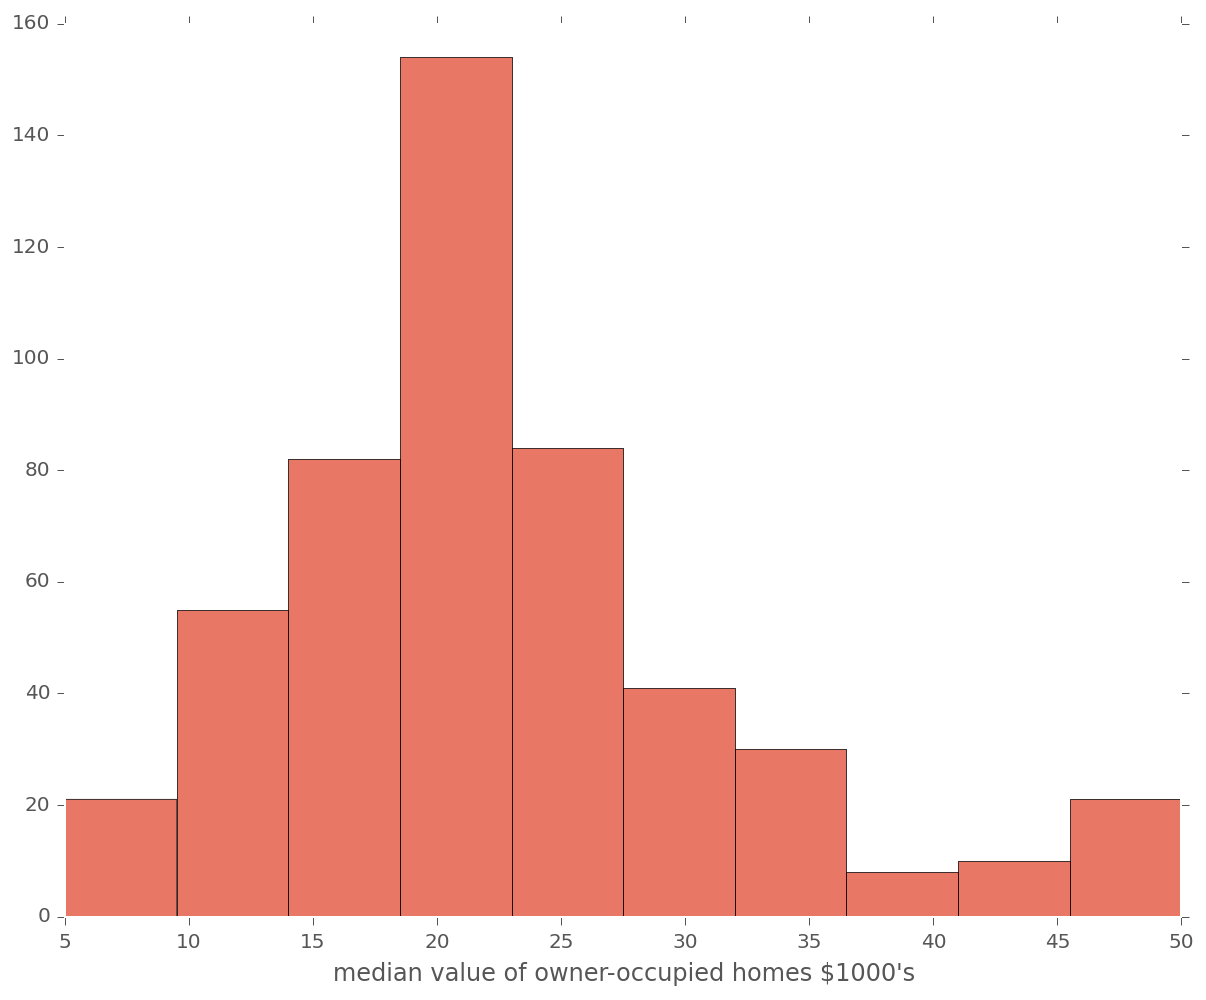

In [5]:
plt.hist(y, alpha=0.75)
plt.xlabel("median value of owner-occupied homes $1000's")
plt.show()

Questions:

- Can we predict the median value of owner-occupied homes?
    - **regression**
- Which characteristics are most important when predicting home values?
    - **inference**, see `stats models`

### Handwritten Digits

In [6]:
digits = datasets.load_digits()
X = digits.data
y = digits.target

print(X.shape)
print(y.shape)

(1797, 64)
(1797,)


In [7]:
print digits.DESCR[:595]

 Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.


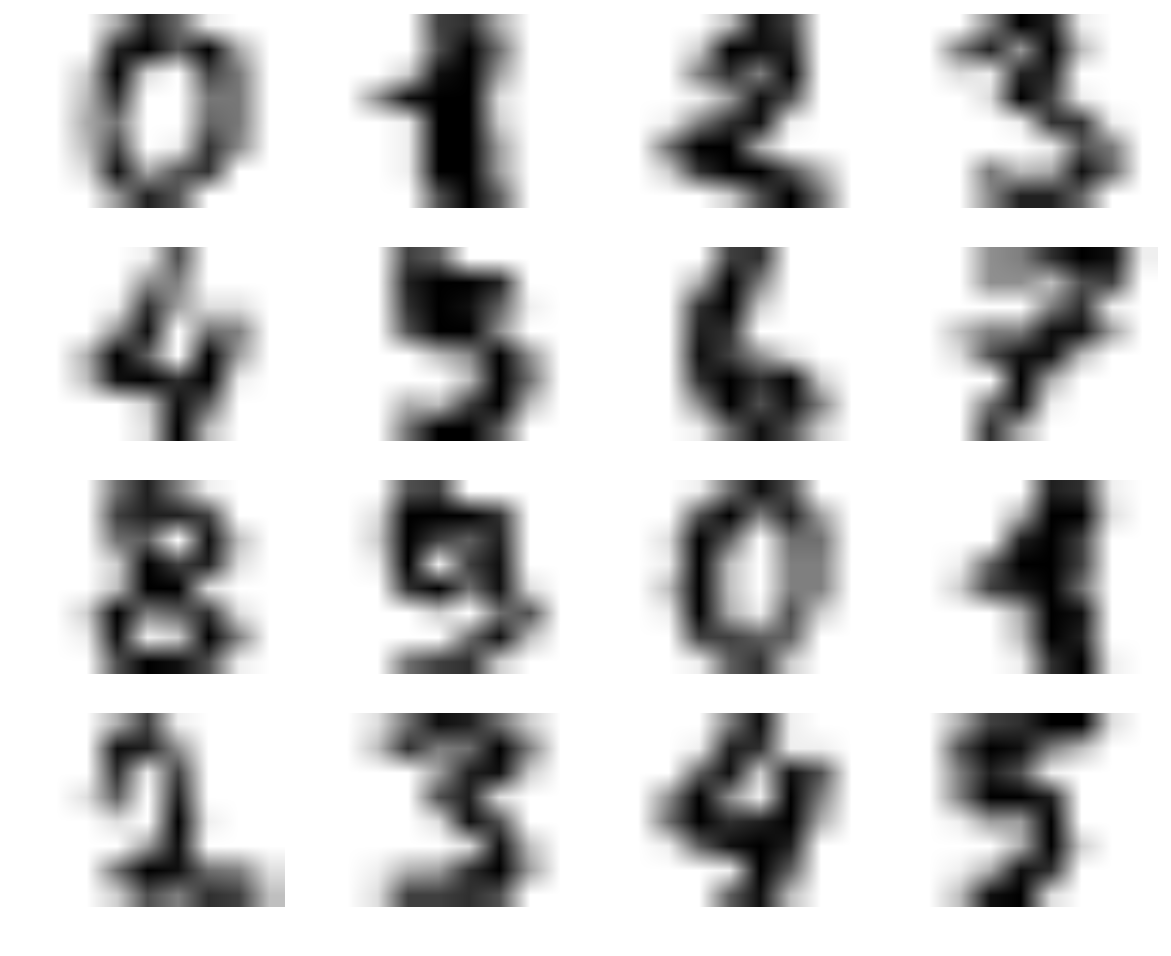

In [11]:
fig, ax = plt.subplots(4,4, sharex=True, sharey=True)
for r in range(4):
    for c in range(4):
        ax[r,c].imshow(X[r*4+c].reshape(8,8), cmap=plt.cm.gray_r, aspect="auto")
        ax[r,c].axis('off')
        
fig.show()

Questions:
    
- Given an image, can we correctly assign it to the correct numeric category?
    - **classification**
- Can we increase the performance (and accuracy) of our prediction by reducing the number of features?
    - **dimensionality reduction**
    

## Supervised and Unsupervised Learning

**Supervised**

- Given a set of labeled data.
- Goal: estimate $\hat{f}(X)$
- Predict
    - quantitative: Regression
    - qualitative: Classification
    
**Unsupervised Learning**

- We do not have labeled data.
- Clustering
- Dimensionality reduction

## The `estimator` object

Every algorithm in `sklearn` is an instance of the `estimator` class.

**Supervised methods**:

- `fit(X,y)`: given features $X$ and resonse $y$, estimate $\hat{f}(x)$.
- `predict(X)`: predict the value of $\hat{y}$ given $X$ (e.g. $\hat{f}(X)$).
- `score(X,y)`: Indication of fit.
- `model.predict_proba()`: for classification, returns a probability instead of class label.

**Usupervised methods**:

- `fit(X`): fit the training data.
- `transform(X)`: returns the new representation of $X$ based on the `fit`.

